## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data Loading and Cleaning

In [2]:
df = pd.read_csv('/kaggle/input/salary-prediction-classification/salary.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


In [5]:
df = df.dropna()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.shape

(32561, 15)

In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Data Preprocessing


#### Removing Duplicates


In [8]:
df.duplicated().sum()

24

In [9]:
df.drop_duplicates(keep = 'first',inplace = True)
df.duplicated().sum()

0

In [10]:
df.shape

(32537, 15)

In [11]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

In [12]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [13]:
df['salary']= df['salary'].replace([' <=50K'],0)
df['salary']= df['salary'].replace([' >50K'],1)
df['salary'].unique()

array([0, 1])

In [14]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [15]:
'''df['sex'].replace([' Male'],0)
df['sex'].replace([' Female'],1)
df['sex'].unique()'''

"df['sex'].replace([' Male'],0)\ndf['sex'].replace([' Female'],1)\ndf['sex'].unique()"

In [16]:
df['sex']= df['sex'].map({' Female': 0, ' Male': 1})
df['sex'].unique()

array([1, 0])

In [17]:
df['salary'].value_counts()

salary
0    24698
1     7839
Name: count, dtype: int64

In [18]:
df['sex'].value_counts()

sex
1    21775
0    10762
Name: count, dtype: int64

#### Handling Missing Values

In [19]:
df['native-country']=df['native-country'].replace("\?",np.nan,regex=True)
df.occupation=df.occupation.replace("\?",np.nan,regex=True)
df.workclass=df.workclass.replace("\?",np.nan,regex=True)

In [20]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
salary               0
dtype: int64

In [21]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df[['workclass','occupation']])
df[['workclass','occupation']] = imputer.transform(df[['workclass','occupation']])
df.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    582
salary              0
dtype: int64

In [22]:
df['occupation'].value_counts()

occupation
 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: count, dtype: int64

In [23]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [24]:
df['education']=df['education'].str.strip()
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [25]:
m = np.array(df['education'].unique())
x = []
for i in m:
    count = 0
    for j in df['education']:
        if i == j:
            count+=1
    x.append(count)
        
print(x)
z = np.array(x)

[5353, 10494, 1175, 1722, 514, 7282, 1067, 1382, 645, 413, 576, 332, 933, 166, 50, 433]


In [26]:
df['workclass'].value_counts()

workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [27]:
df['native-country'].unique()
 

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [28]:
df['native-country'].value_counts()

native-country
 United-States                 29153
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                

In [29]:
df['native-country']=df['native-country'].apply(lambda x: 'other' if x!=' United-States' else 'United-States')
df['native-country'].value_counts()

native-country
United-States    29153
other             3384
Name: count, dtype: int64

## Data Visualisation

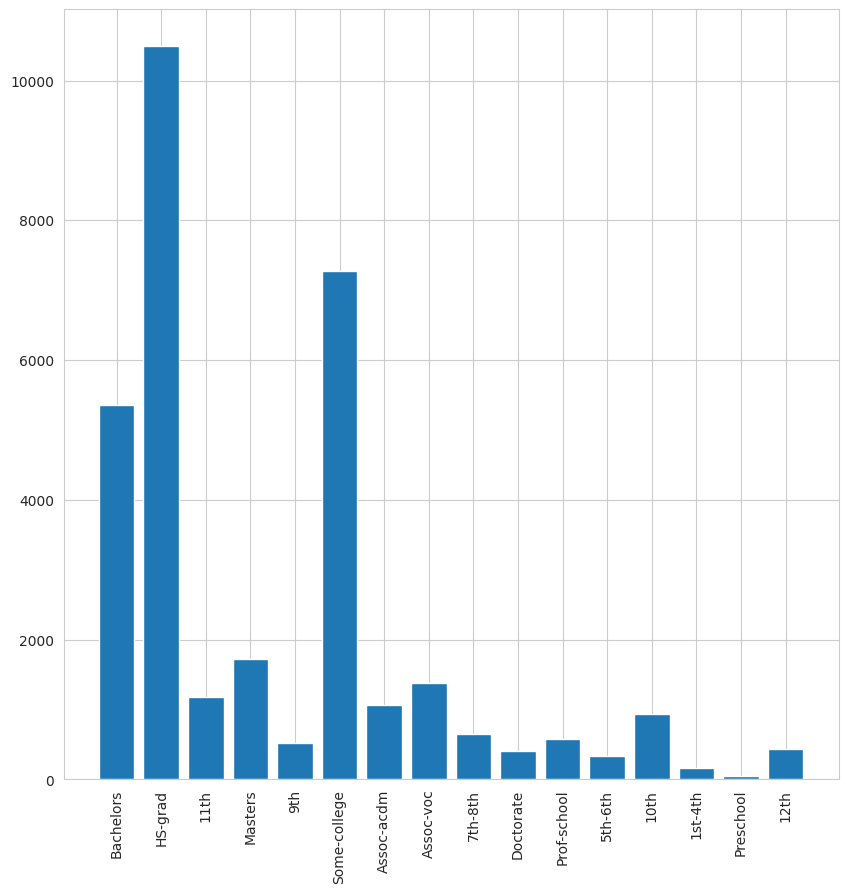

In [30]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.bar(m,z)
plt.show()

Text(0.5, 1.0, 'Salaries ratio for Male/Female')

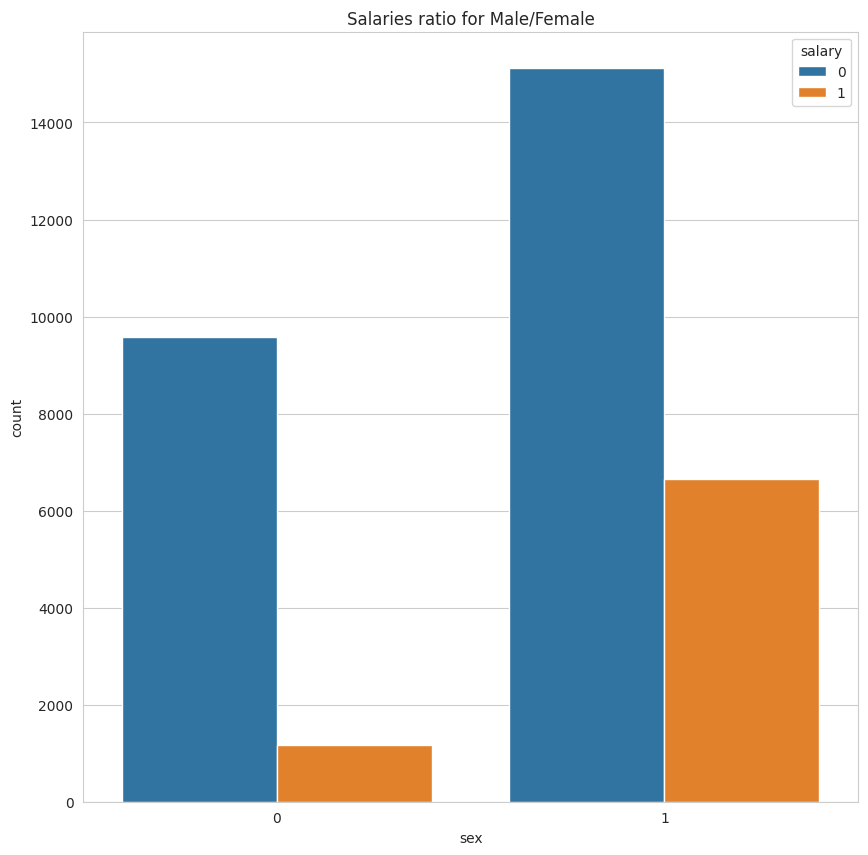

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='sex', hue='salary').set_title('Salaries ratio for Male/Female')

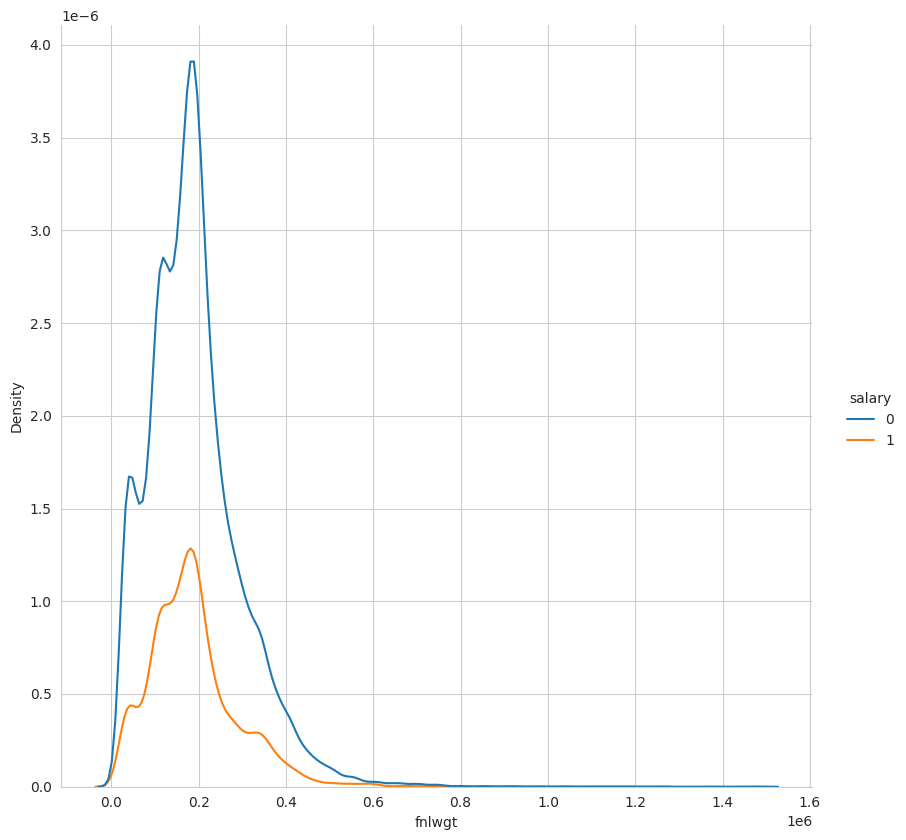

In [32]:
sns.displot(data=df, x="fnlwgt",kind = 'kde' ,hue = 'salary',height=8.5, aspect=1)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

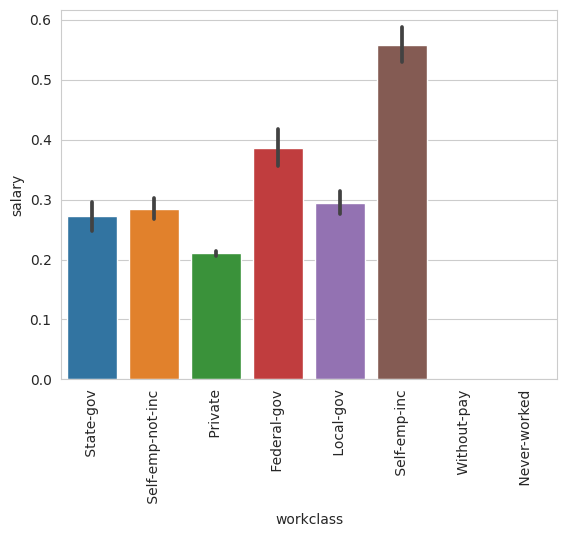

In [33]:
sns.barplot(data=df, x="workclass",y="salary")
plt.xticks(rotation=90)

In [34]:
jobtype = {}
for name in df['workclass'].unique():
    count  = 0
    for i in df['workclass']:
        if i==name:
            count+=1
    jobtype[name]=count

jobs = pd.Series(jobtype)
jobs

 State-gov            1298
 Self-emp-not-inc     2540
 Private             24509
 Federal-gov           960
 Local-gov            2093
 Self-emp-inc         1116
 Without-pay            14
 Never-worked            7
dtype: int64

([<matplotlib.patches.Wedge at 0x7ea79c516d40>,
 [Text(1.0913724338070712, 0.13749985718549013, ' State-gov'),
  Text(0.9674929505083985, 0.5234093911237683, ' Self-emp-not-inc'),
  Text(-1.0993647392227237, 0.03737873932803352, ' Private'),
  Text(0.829567380817032, -0.7223696842229534, ' Federal-gov'),
  Text(1.0036548295404666, -0.4501966049850858, ' Local-gov'),
  Text(1.093131327026857, -0.12273508818794547, ' Self-emp-inc'),
  Text(2.999989035649453, -0.00811085587753275, ' Without-pay'),
  Text(1.7999995887482632, -0.001216760487439187, ' Never-worked')],
 [Text(0.595294054803857, 0.07499992210117642, '3.99%'),
  Text(0.5277234275500354, 0.2854960315220554, '7.81%'),
  Text(-0.5996534941214856, 0.02038840326983646, '75.33%'),
  Text(0.45249129862747195, -0.39401982775797456, '2.95%'),
  Text(0.5474480888402544, -0.2455617845373195, '6.43%'),
  Text(0.5962534511055583, -0.06694641173887934, '3.43%'),
  Text(2.4999908630412104, -0.006759046564610624, '0.04%'),
  Text(1.29999970298

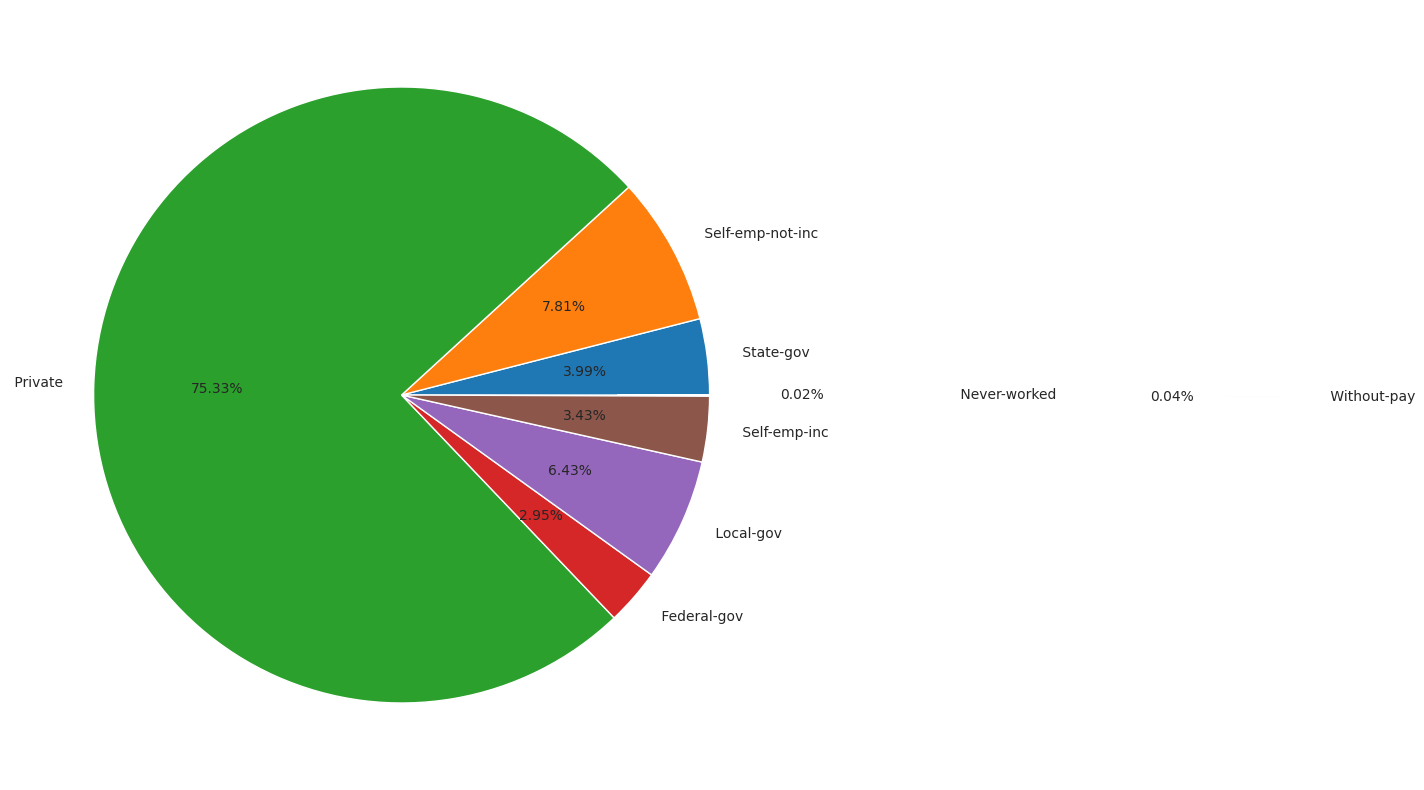

In [35]:
plt.figure(figsize=(10,10 ))
explode = (0, 0, 0, 0,0,0,1.9,0.7)
plt.pie(jobs[:],labels = jobs.index,explode = explode, autopct='%1.2f%%')


In [36]:
'''plt.figure(figsize = (15,10))
# x = education-num y= age s  = hours-per-week     group = nativecountry.unique
ax = sns.scatterplot(x =df['education-num'],y=df['age'],s = df['hours-per-week'],alpha=0.5)
ax.set_xlim(0,6)
ax.set_ylim(-2,18)

for line in range(0,df.shape[0]):
    ax.text(df['education-num'][line],df[''])'''

"plt.figure(figsize = (15,10))\n# x = education-num y= age s  = hours-per-week     group = nativecountry.unique\nax = sns.scatterplot(x =df['education-num'],y=df['age'],s = df['hours-per-week'],alpha=0.5)\nax.set_xlim(0,6)\nax.set_ylim(-2,18)\n\nfor line in range(0,df.shape[0]):\n    ax.text(df['education-num'][line],df[''])"

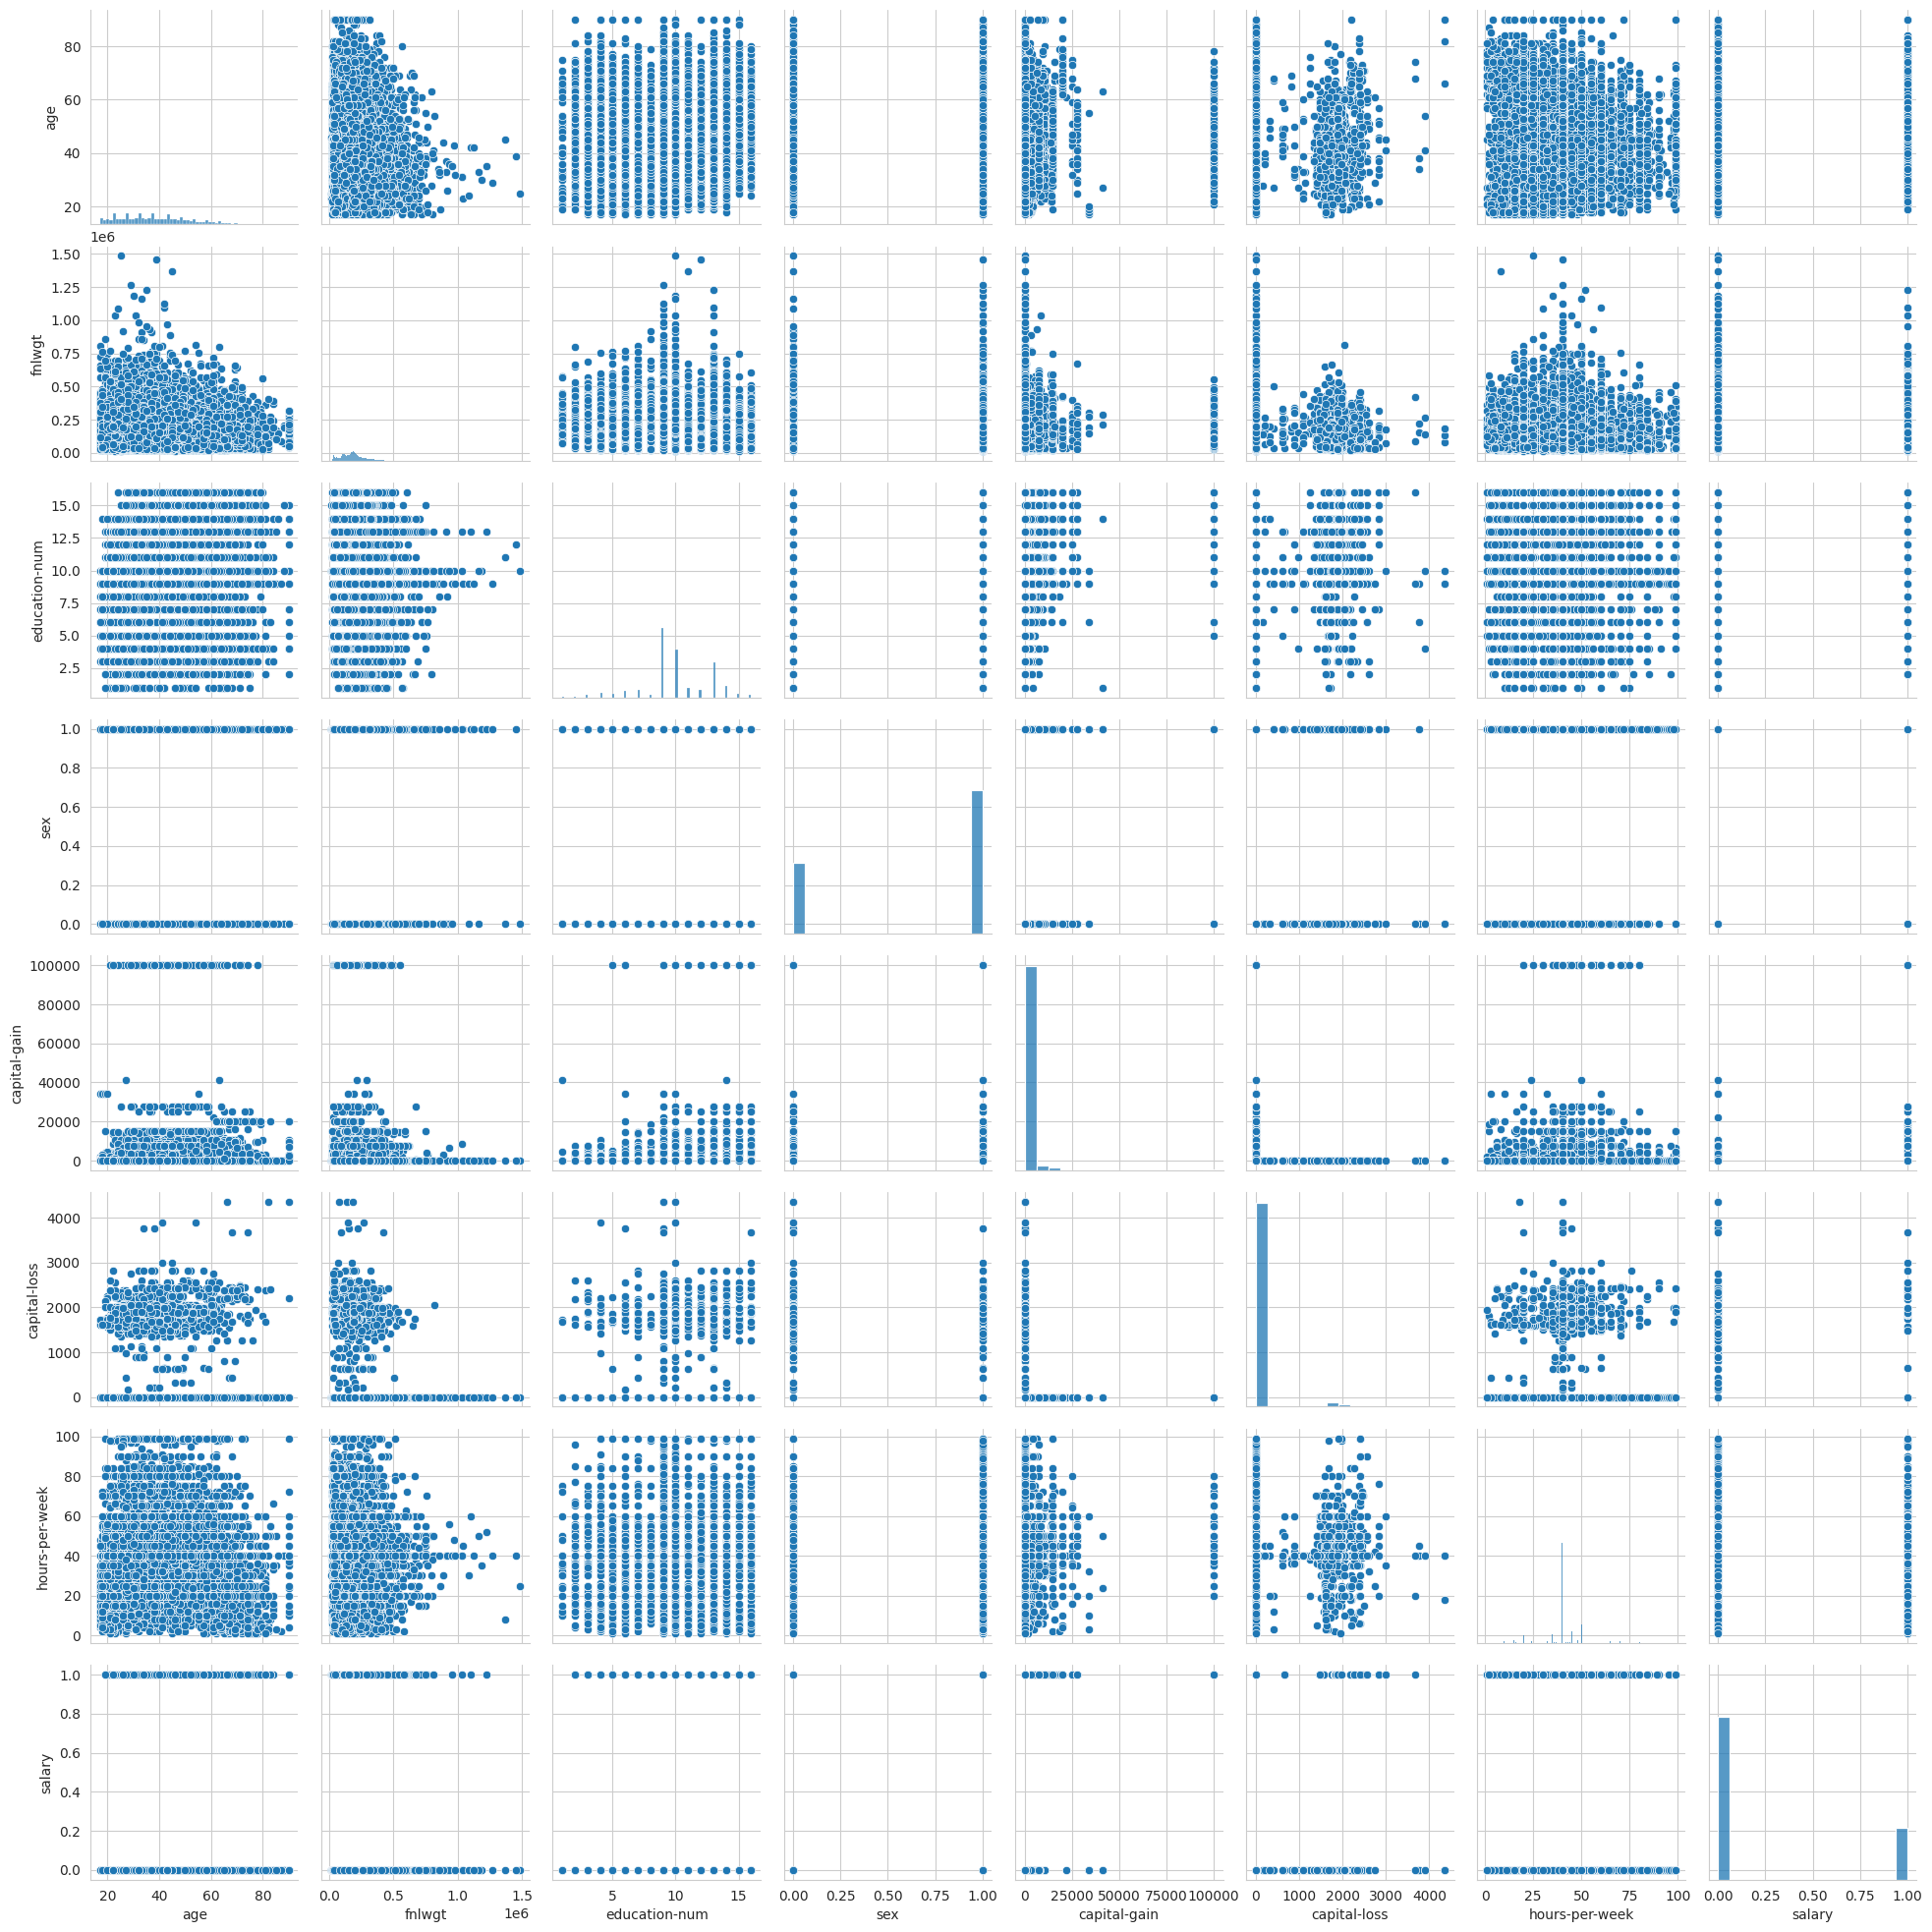

In [37]:
sns.pairplot(df)

#### Pre-processing  & Visualisation

In [38]:
df_num = df.drop(['workclass','education','occupation','relationship','race','native-country'],axis=1)
df_num.head()

,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,77516,13,Never-married,1,2174,0,40,0
1,50,83311,13,Married-civ-spouse,1,0,0,13,0
2,38,215646,9,Divorced,1,0,0,40,0
3,53,234721,7,Married-civ-spouse,1,0,0,40,0
4,28,338409,13,Married-civ-spouse,0,0,0,40,0


In [39]:
df_num['marital-status'] =  df_num['marital-status'].replace([' Married-civ-spouse' , ' Married-spouse-absent' , ' Married-AF-spouse' ] , 1)
df_num['marital-status'] =  df_num['marital-status'].replace([' Divorced' , ' Separated' , ' Widowed' ] , 0)
df_num['marital-status'] =  df_num['marital-status'].replace([' Never-married'] , 2)
df_num.head()

,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,77516,13,2,1,2174,0,40,0
1,50,83311,13,1,1,0,0,13,0
2,38,215646,9,0,1,0,0,40,0
3,53,234721,7,1,1,0,0,40,0
4,28,338409,13,1,0,0,0,40,0


In [40]:
df_num.corr()

,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,salary
age,1.000000,-0.076447,0.036224,-0.480281,0.088708,0.077676,0.057745,0.068515,0.234037
fnlwgt,-0.076447,1.000000,-0.043388,0.030940,0.027089,0.000429,-0.010260,-0.018898,-0.009502
education-num,0.036224,-0.043388,1.000000,0.012853,0.012205,0.122664,0.079892,0.148422,0.335272
marital-status,-0.480281,0.030940,0.012853,1.000000,0.069347,-0.028364,-0.025006,-0.112642,-0.114446
sex,0.088708,0.027089,0.012205,0.069347,1.000000,0.048489,0.045571,0.229187,0.215969
capital-gain,0.077676,0.000429,0.122664,-0.028364,0.048489,1.000000,-0.031639,0.078408,0.223336
capital-loss,0.057745,-0.010260,0.079892,-0.025006,0.045571,-0.031639,1.000000,0.054229,0.150501
hours-per-week,0.068515,-0.018898,0.148422,-0.112642,0.229187,0.078408,0.054229,1.000000,0.229658
salary,0.234037,-0.009502,0.335272,-0.114446,0.215969,0.223336,0.150501,0.229658,1.000000


<Axes: >

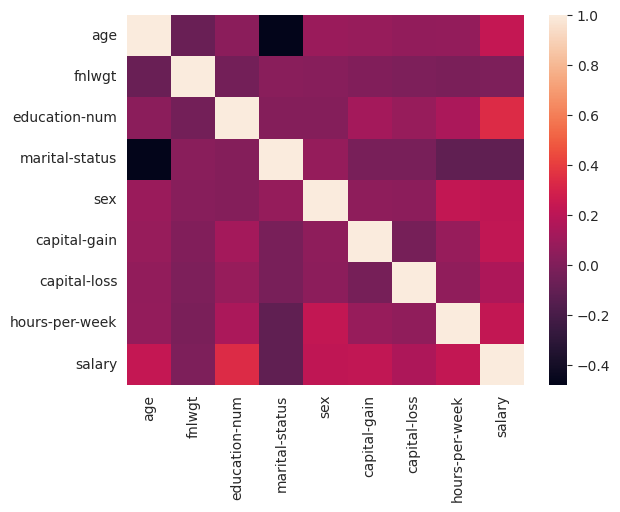

In [41]:
sns.heatmap(df_num.corr())

#### The age wise distribution 


/tmp/ipykernel_20/2135096549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],hist = False)


<Axes: xlabel='age', ylabel='Density'>

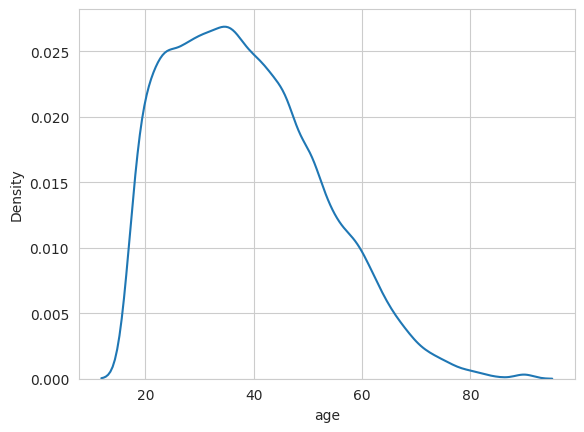

In [42]:
sns.distplot(df['age'],hist = False)